===  Q-LEARNING (CORREGIDO) ===
Q-table inicial (TODO CERO):
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

Episodio 0: Recompensa = 0.2
Trayectoria: E0-A0 -> E0-A1 -> E1-A0 -> E0-A0 -> E0-A1 -> E1-A1 -> E2-A0 -> E1-A1 -> E2-A1
Q-table actual:
[[-0.0975 -0.075 ]
 [-0.0725 -0.075 ]
 [-0.0725  0.5   ]
 [ 0.      0.    ]]

Episodio 20: Recompensa = 0.8
Trayectoria: E0-A1 -> E1-A1 -> E2-A1
Q-table actual:
[[0.40041523 0.61998681]
 [0.40376632 0.79999811]
 [0.60659619 0.99999952]
 [0.         0.        ]]

Episodio 40: Recompensa = 0.8
Trayectoria: E0-A1 -> E1-A1 -> E2-A1
Q-table actual:
[[0.44360322 0.62      ]
 [0.44444126 0.8       ]
 [0.61329809 1.        ]
 [0.         0.        ]]

Episodio 60: Recompensa = 0.8
Trayectoria: E0-A1 -> E1-A1 -> E2-A1
Q-table actual:
[[0.4544008  0.62      ]
 [0.45461032 0.8       ]
 [0.61994764 1.        ]
 [0.         0.        ]]

Episodio 80: Recompensa = 0.8
Trayectoria: E0-A1 -> E1-A1 -> E2-A1
Q-table actual:
[[0.45777505 0.62      ]
 [0.45461032 0.8       ]

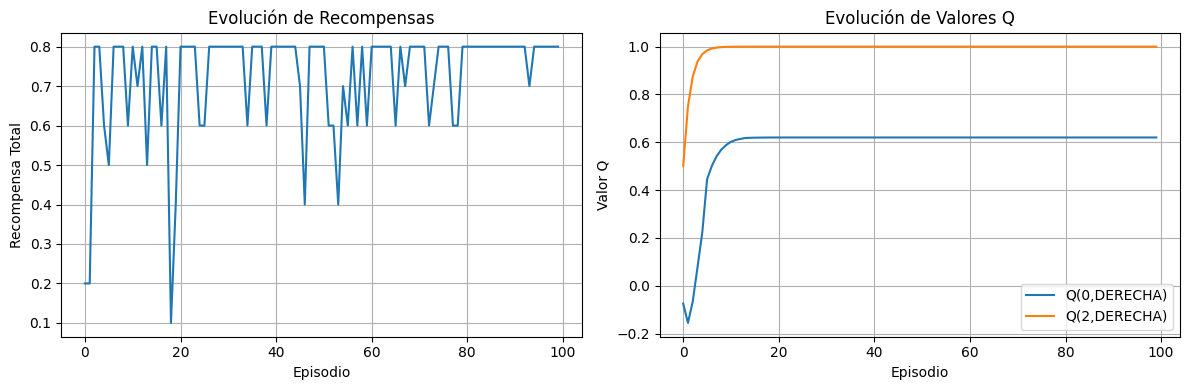

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

# =============================================================================
# Q-LEARNING - AMBIENTE MÁS SIMPLE
# =============================================================================

print("===  Q-LEARNING (CORREGIDO) ===")

class AgenteQLearning:
    def __init__(self, n_estados, n_acciones, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.n_estados = n_estados
        self.n_acciones = n_acciones
        self.alpha = alpha      # Qué tan rápido aprendo
        self.gamma = gamma      # Importancia del futuro
        self.epsilon = epsilon  # Probabilidad de explorar
        self.q_tabla = np.zeros((n_estados, n_acciones))
    
    def elegir_accion(self, estado):
        # Con probabilidad epsilon, acción aleatoria (explorar)
        # Sino, mejor acción según Q-table (explotar)
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_acciones)
        else:
            return np.argmax(self.q_tabla[estado])
    
    def actualizar(self, estado, accion, recompensa, siguiente_estado):
        # FÓRMULA Q-LEARNING:
        # Q(s,a) = Q(s,a) + α * (recompensa + γ * max Q(s',a') - Q(s,a))
        q_actual = self.q_tabla[estado, accion]
        mejor_q_futuro = np.max(self.q_tabla[siguiente_estado])
        objetivo = recompensa + self.gamma * mejor_q_futuro
        self.q_tabla[estado, accion] = q_actual + self.alpha * (objetivo - q_actual)

def entrenar_q_learning():
    # Usaremos un ambiente más simple: GridWorld personalizado
    class SimpleGridWorld:
        def __init__(self):
            self.estado = 0
            self.meta = 3
            self.estados = 4  # 0,1,2,3
            
        def reset(self):
            self.estado = 0
            return self.estado
            
        def step(self, accion):
            # 0: izquierda, 1: derecha
            if accion == 0 and self.estado > 0:  # izquierda
                self.estado -= 1
            elif accion == 1 and self.estado < 3:  # derecha
                self.estado += 1
                
            recompensa = 1 if self.estado == self.meta else -0.1
            terminado = (self.estado == self.meta)
            
            return self.estado, recompensa, terminado, False, {}
    
    env = SimpleGridWorld()
    
    agente = AgenteQLearning(
        n_estados=4,    # 4 estados: 0,1,2,3
        n_acciones=2,   # 2 acciones: izquierda(0), derecha(1)
        alpha=0.5,      # Aprendizaje más rápido
        gamma=0.9, 
        epsilon=0.2
    )
    
    recompensas_totales = []
    q_historico = []  # Para ver cómo evoluciona la Q-table
    
    print("Q-table inicial (TODO CERO):")
    print(agente.q_tabla)
    
    for episodio in range(100):
        estado = env.reset()
        recompensa_episodio = 0
        terminado = False
        
        pasos = []
        
        while not terminado:
            accion = agente.elegir_accion(estado)
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            
            # Actualizar Q-table
            agente.actualizar(estado, accion, recompensa, siguiente_estado)
            
            pasos.append(f"E{estado}-A{accion}")
            estado = siguiente_estado
            recompensa_episodio += recompensa
        
        recompensas_totales.append(recompensa_episodio)
        q_historico.append(agente.q_tabla.copy())
        
        if episodio % 20 == 0:
            print(f"\nEpisodio {episodio}: Recompensa = {recompensa_episodio:.1f}")
            print(f"Trayectoria: {' -> '.join(pasos)}")
            print("Q-table actual:")
            print(agente.q_tabla)
    
    # Resultados finales
    print(f"\n{'='*50}")
    print("RESULTADO FINAL:")
    print(f"{'='*50}")
    print("Q-table FINAL (debería mostrar valores aprendidos):")
    print(agente.q_tabla)
    print(f"\nPolítica aprendida (mejor acción por estado):")
    for estado in range(4):
        mejor_accion = np.argmax(agente.q_tabla[estado])
        direccion = "IZQUIERDA" if mejor_accion == 0 else "DERECHA"
        print(f"Estado {estado} -> {direccion} (valores: {agente.q_tabla[estado]})")
    
    # Gráficos
    plt.figure(figsize=(12, 4))
    
    # Evolución de recompensas
    plt.subplot(1, 2, 1)
    plt.plot(recompensas_totales)
    plt.title('Evolución de Recompensas')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa Total')
    plt.grid(True)
    
    # Evolución de valores Q para estado 0, acción derecha
    plt.subplot(1, 2, 2)
    q_estado0_derecha = [q[0, 1] for q in q_historico]  # Estado 0, acción derecha
    q_estado2_derecha = [q[2, 1] for q in q_historico]  # Estado 2, acción derecha
    
    plt.plot(q_estado0_derecha, label='Q(0,DERECHA)')
    plt.plot(q_estado2_derecha, label='Q(2,DERECHA)')
    plt.title('Evolución de Valores Q')
    plt.xlabel('Episodio')
    plt.ylabel('Valor Q')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return agente

# Ejecutar Q-Learning corregido
agente_q = entrenar_q_learning()


 MUNDO 10x10 - AGENTE ALEATORIO vs AGENTE ENTRENADO

 FASE 1: AGENTE ALEATORIO EN ACCIÓN
(Sin conocimiento del entorno)

 EPISODIO 1 - AGENTE ALEATORIO

AGENTE: ALEATORIO | Posición: (0, 0) | Acción: ·
 0 | X · · · · · · · · ·
 1 | · · · · · · · · · ·
 2 | · · █ █ █ · · · · ·
 3 | · · · 2 · · · · · ·
 4 | · · · · · · · · · ·
 5 | · · · · · █ █ █ █ ·
 6 | · · 3 · · · · · · ·
 7 | · █ █ █ · · · · · ·
 8 | · · · · · · █ █ 5 ·
 9 | · · · · · · █ · · G
    0 1 2 3 4 5 6 7 8 9
Leyenda: X=Agente, G=Meta, █=Obstáculo, 2/3/5=Premios

AGENTE: ALEATORIO | Posición: (0, 0) | Acción: ↑
 0 | X · · · · · · · · ·
 1 | · · · · · · · · · ·
 2 | · · █ █ █ · · · · ·
 3 | · · · 2 · · · · · ·
 4 | · · · · · · · · · ·
 5 | · · · · · █ █ █ █ ·
 6 | · · 3 · · · · · · ·
 7 | · █ █ █ · · · · · ·
 8 | · · · · · · █ █ 5 ·
 9 | · · · · · · █ · · G
    0 1 2 3 4 5 6 7 8 9
Leyenda: X=Agente, G=Meta, █=Obstáculo, 2/3/5=Premios
Recompensa: -0.05 | Acumulada: -0.05

AGENTE: ALEATORIO | Posición: (0, 1) | Acción: →
 0 | 

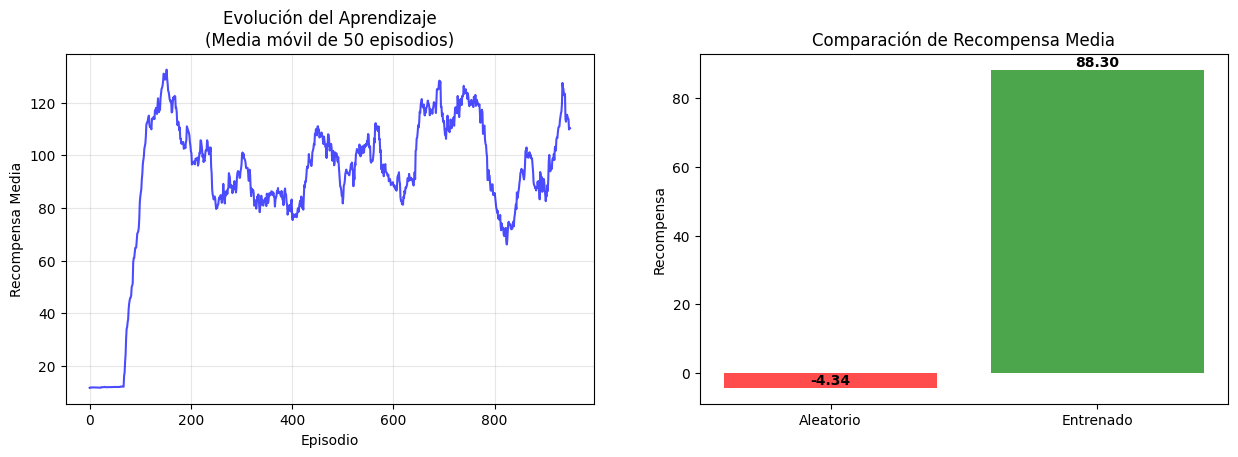

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

# =============================================================================
# AMBIENTE 10x10 MÁS COMPLEJO
# =============================================================================

class GridWorld10x10:
    def __init__(self):
        self.size = 10
        self.meta = (9, 9)  # Meta en esquina inferior derecha
        self.inicio = (0, 0)  # Inicio en esquina superior izquierda
        self.estado_actual = self.inicio
        
        # Crear obstáculos en posiciones fijas
        self.obstaculos = [
            (2, 2), (2, 3), (2, 4),
            (5, 5), (5, 6), (5, 7), (5, 8),
            (7, 1), (7, 2), (7, 3),
            (8, 6), (8, 7), (9, 6)
        ]
        
        # Premios especiales
        self.premios = {
            (3, 3): 2,   # Premio pequeño
            (6, 2): 3,   # Premio mediano  
            (8, 8): 5,   # Premio grande cerca de meta
        }
        
    def reset(self):
        self.estado_actual = self.inicio
        return self.estado_actual
        
    def step(self, accion):
        """Acciones: 0=arriba, 1=derecha, 2=abajo, 3=izquierda"""
        fila, col = self.estado_actual
        fila_anterior, col_anterior = fila, col
        
        # Mover según acción
        if accion == 0 and fila > 0:  # arriba
            fila -= 1
        elif accion == 1 and col < self.size - 1:  # derecha
            col += 1
        elif accion == 2 and fila < self.size - 1:  # abajo
            fila += 1
        elif accion == 3 and col > 0:  # izquierda
            col -= 1
        
        nuevo_estado = (fila, col)
        
        # Verificar obstáculos
        if nuevo_estado in self.obstaculos:
            nuevo_estado = (fila_anterior, col_anterior)  # No se mueve
            recompensa = -2  # Penalización por chocar
        
        # Verificar premios
        elif nuevo_estado in self.premios:
            recompensa = self.premios[nuevo_estado]  # Recompensa del premio
        
        # Verificar meta
        elif nuevo_estado == self.meta:
            recompensa = 10  # Gran recompensa por llegar
        
        # Movimiento normal
        else:
            # Pequeña recompensa por avanzar hacia la meta
            distancia_anterior = abs(fila_anterior - 9) + abs(col_anterior - 9)
            distancia_actual = abs(fila - 9) + abs(col - 9)
            
            if distancia_actual < distancia_anterior:
                recompensa = 0.1  # Pequeña recompensa por acercarse
            elif distancia_actual > distancia_anterior:
                recompensa = -0.1  # Pequeña penalización por alejarse
            else:
                recompensa = -0.05  # Penalización por no moverse efectivamente
        
        self.estado_actual = nuevo_estado
        terminado = (nuevo_estado == self.meta)
        
        return nuevo_estado, recompensa, terminado, False, {}
    
    def render(self, accion=None, agente="ALEATORIO"):
        """Visualizar el grid 10x10"""
        grid = np.full((self.size, self.size), '·')  # Puntos para espacios vacíos
        
        # Marcar elementos especiales
        for obs in self.obstaculos:
            grid[obs] = '█'  # Obstáculos
        
        for premio_pos, valor in self.premios.items():
            grid[premio_pos] = str(valor)  # Premios con su valor
        
        grid[self.meta] = 'G'  # Meta
        grid[self.estado_actual] = 'X'  # Agente
        
        # Convertir acción a texto
        accion_texto = {0: '↑', 1: '→', 2: '↓', 3: '←'}
        accion_str = accion_texto.get(accion, '·')
        
        print(f"\n{'='*50}")
        print(f"AGENTE: {agente} | Posición: {self.estado_actual} | Acción: {accion_str}")
        print('='*50)
        
        # Imprimir grid
        for i in range(self.size):
            fila_str = " ".join(grid[i])
            print(f"{i:2d} | {fila_str}")
        
        print("    " + " ".join([str(j) for j in range(self.size)]))
        print(f"Leyenda: X=Agente, G=Meta, █=Obstáculo, 2/3/5=Premios")
    
    def get_estado_index(self, estado):
        """Convertir coordenadas (fila, columna) a índice único"""
        fila, col = estado
        return fila * self.size + col

# =============================================================================
# AGENTE Q-LEARNING PARA 10x10
# =============================================================================

class AgenteQLearning10x10:
    def __init__(self, n_estados, n_acciones, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.n_estados = n_estados
        self.n_acciones = n_acciones
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_tabla = np.zeros((n_estados, n_acciones))
    
    def elegir_accion(self, estado_index, modo="aprendizaje"):
        if modo == "aleatorio":
            return np.random.randint(self.n_acciones)
        elif modo == "aprendizaje":
            if np.random.random() < self.epsilon:
                return np.random.randint(self.n_acciones)
            else:
                return np.argmax(self.q_tabla[estado_index])
        else:  # modo "explotacion"
            return np.argmax(self.q_tabla[estado_index])
    
    def actualizar(self, estado_index, accion, recompensa, siguiente_estado_index):
        q_actual = self.q_tabla[estado_index, accion]
        mejor_q_futuro = np.max(self.q_tabla[siguiente_estado_index])
        objetivo = recompensa + self.gamma * mejor_q_futuro
        self.q_tabla[estado_index, accion] = q_actual + self.alpha * (objetivo - q_actual)

# =============================================================================
# DEMOSTRACIÓN COMPLETA 10x10
# =============================================================================

def demostrar_10x10():
    print("=" * 70)
    print(" MUNDO 10x10 - AGENTE ALEATORIO vs AGENTE ENTRENADO")
    print("=" * 70)
    
    # Crear ambiente y agente
    env = GridWorld10x10()
    agente = AgenteQLearning10x10(
        n_estados=100,  # 10x10 = 100 estados
        n_acciones=4,   # 4 acciones: arriba, derecha, abajo, izquierda
        alpha=0.3,      # Aprendizaje más rápido
        gamma=0.95,     # Planificación a largo plazo
        epsilon=0.2     # 20% de exploración
    )
    
    # =======================================================================
    # FASE 1: AGENTE ALEATORIO (DEMOSTRACIÓN VISUAL)
    # =======================================================================
    print("\n FASE 1: AGENTE ALEATORIO EN ACCIÓN")
    print("(Sin conocimiento del entorno)")
    
    #input("Presiona Enter para ver al agente aleatorio...")
    
    recompensas_aleatorio = []
    for episodio in range(3):  # Mostrar solo 3 episodios de ejemplo
        estado = env.reset()
        estado_index = env.get_estado_index(estado)
        recompensa_total = 0
        pasos = 0
        terminado = False
        
        print(f"\n EPISODIO {episodio + 1} - AGENTE ALEATORIO")
        env.render(agente="ALEATORIO")
        
        historial_posiciones = [estado]
        
        while not terminado and pasos < 20:  # Límite de pasos
            # Acción completamente aleatoria
            accion = agente.elegir_accion(estado_index, modo="aleatorio")
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            siguiente_estado_index = env.get_estado_index(siguiente_estado)
            
            env.render(accion, agente="ALEATORIO")
            print(f"Recompensa: {recompensa:.2f} | Acumulada: {recompensa_total + recompensa:.2f}")
            
            estado = siguiente_estado
            estado_index = siguiente_estado_index
            recompensa_total += recompensa
            pasos += 1
            historial_posiciones.append(estado)
            
            if terminado:
                print(" ¡LLEGÓ A LA META!")
                break
            elif pasos >= 20:
                print(" SE AGOTARON LOS PASOS")
            
            #if pasos < 5:  # Pausa solo en primeros pasos para no saturar
             #   input("Presiona Enter para siguiente paso...")
        
        recompensas_aleatorio.append(recompensa_total)
        print(f"\n Resumen Episodio {episodio + 1}:")
        print(f"   • Pasos: {pasos}")
        print(f"   • Recompensa total: {recompensa_total:.2f}")
        print(f"   • ¿Llegó a meta?: {'SÍ' if terminado else 'NO'}")
    
    # =======================================================================
    # FASE 2: ENTRENAMIENTO SILENCIOSO (RÁPIDO)
    # =======================================================================
    print("\n" + "=" * 50)
    print(" ENTRENANDO AL AGENTE (1000 episodios)...")
    print("=" * 50)
    
    recompensas_entrenamiento = []
    for episodio in range(1000):
        estado = env.reset()
        estado_index = env.get_estado_index(estado)
        recompensa_total = 0
        terminado = False
        
        while not terminado:
            accion = agente.elegir_accion(estado_index, modo="aprendizaje")
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            siguiente_estado_index = env.get_estado_index(siguiente_estado)
            
            agente.actualizar(estado_index, accion, recompensa, siguiente_estado_index)
            estado = siguiente_estado
            estado_index = siguiente_estado_index
            recompensa_total += recompensa
        
        recompensas_entrenamiento.append(recompensa_total)
        
        if episodio % 200 == 0:
            print(f"Episodio {episodio}: Recompensa = {recompensa_total:.2f}")
    
    # =======================================================================
    # FASE 3: AGENTE ENTRENADO (DEMOSTRACIÓN VISUAL)
    # =======================================================================
    print("\n" + "=" * 50)
    print(" FASE 3: AGENTE ENTRENADO EN ACCIÓN")
    print("=" * 50)
    
   # input("Presiona Enter para ver al agente entrenado...")
    
    # Mostrar política aprendida para algunas posiciones clave
    print("\n POLÍTICA APRENDIDA (ejemplos):")
    posiciones_ejemplo = [(0, 0), (0, 5), (5, 0), (5, 5), (8, 8)]
    
    for pos in posiciones_ejemplo:
        estado_idx = env.get_estado_index(pos)
        mejor_accion = np.argmax(agente.q_tabla[estado_idx])
        accion_texto = {0: 'ARRIBA', 1: 'DERECHA', 2: 'ABAJO', 3: 'IZQUIERDA'}
        valores = [f"{q:.2f}" for q in agente.q_tabla[estado_idx]]
        print(f"Posición {pos}: {accion_texto[mejor_accion]} (valores: {valores})")
    
    recompensas_entrenado = []
    for episodio in range(3):  # Mostrar solo 3 episodios de ejemplo
        estado = env.reset()
        estado_index = env.get_estado_index(estado)
        recompensa_total = 0
        pasos = 0
        terminado = False
        
        print(f"\n EPISODIO {episodio + 1} - AGENTE ENTRENADO")
        env.render(agente="ENTRENADO")
        
        historial_posiciones = [estado]
        
        while not terminado and pasos < 30:
            # Usar solo lo aprendido (sin exploración)
            accion = agente.elegir_accion(estado_index, modo="explotacion")
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            siguiente_estado_index = env.get_estado_index(siguiente_estado)
            
            env.render(accion, agente="ENTRENADO")
            print(f"Recompensa: {recompensa:.2f} | Acumulada: {recompensa_total + recompensa:.2f}")
            
            estado = siguiente_estado
            estado_index = siguiente_estado_index
            recompensa_total += recompensa
            pasos += 1
            historial_posiciones.append(estado)
            
            if terminado:
                print("¡LLEGÓ A LA META!")
                break
            
          #  if pasos < 8:  # Pausa solo en primeros pasos
            #    input("Presiona Enter para siguiente paso...")
        
        recompensas_entrenado.append(recompensa_total)
        print(f"\n Resumen Episodio {episodio + 1}:")
        print(f"   • Pasos: {pasos}")
        print(f"   • Recompensa total: {recompensa_total:.2f}")
        print(f"   • ¿Llegó a meta?: {'SÍ' if terminado else 'NO'}")
    
    # =======================================================================
    # COMPARACIÓN ESTADÍSTICA
    # =======================================================================
    print("\n" + "=" * 70)
    print("ESTADÍSTICAS COMPARATIVAS (500 episodios cada uno)")
    print("=" * 70)
    
    # Simular muchos episodios para estadísticas
    def simular_episodios(env, agente, modo, n_episodios=500):
        recompensas = []
        exitos = 0
        pasos_totales = 0
        
        for _ in range(n_episodios):
            estado = env.reset()
            estado_index = env.get_estado_index(estado)
            recompensa_episodio = 0
            pasos = 0
            terminado = False
            
            while not terminado and pasos < 50:  # Límite de pasos
                accion = agente.elegir_accion(estado_index, modo=modo)
                siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
                estado_index = env.get_estado_index(siguiente_estado)
                recompensa_episodio += recompensa
                pasos += 1
            
            recompensas.append(recompensa_episodio)
            if terminado:
                exitos += 1
            pasos_totales += pasos
        
        return {
            'recompensas': recompensas,
            'exitos': exitos,
            'pasos_promedio': pasos_totales / n_episodios
        }
    
    print("Simulando 500 episodios de cada agente...")
    
    stats_aleatorio = simular_episodios(env, agente, "aleatorio", 500)
    stats_entrenado = simular_episodios(env, agente, "explotacion", 500)
    
    # =======================================================================
    # GRÁFICOS COMPARATIVOS
    # =======================================================================
    plt.figure(figsize=(15, 10))
    
    # Gráfico 1: Evolución del entrenamiento
    plt.subplot(2, 2, 1)
    ventana = 50  # Media móvil de 50 episodios
    media_movil = [np.mean(recompensas_entrenamiento[i:i+ventana]) 
                  for i in range(len(recompensas_entrenamiento)-ventana)]
    plt.plot(media_movil, color='blue', alpha=0.7)
    plt.title('Evolución del Aprendizaje\n(Media móvil de 50 episodios)')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa Media')
    plt.grid(True, alpha=0.3)
    
    # Gráfico 2: Comparación de recompensas
    plt.subplot(2, 2, 2)
    categorias = ['Aleatorio', 'Entrenado']
    medias = [np.mean(stats_aleatorio['recompensas']), 
              np.mean(stats_entrenado['recompensas'])]
    
    barras = plt.bar(categorias, medias, color=['red', 'green'], alpha=0.7)
    plt.title('Comparación de Recompensa Media')
    plt.ylabel('Recompensa')
    
    for barra, valor in zip(barras, medias):
        plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.1, 
                f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')
    
   
   
    print(f"\n AGENTE ALEATORIO:")
    print(f"   • Recompensa media: {np.mean(stats_aleatorio['recompensas']):.2f}")
    print(f"   • Tasa de éxito: {stats_aleatorio['exitos']}/500 ({stats_aleatorio['exitos']/5:.1f}%)")
    print(f"   • Pasos promedio: {stats_aleatorio['pasos_promedio']:.1f}")
    
    print(f"\nAGENTE ENTRENADO:")
    print(f"   • Recompensa media: {np.mean(stats_entrenado['recompensas']):.2f}")
    print(f"   • Tasa de éxito: {stats_entrenado['exitos']}/500 ({stats_entrenado['exitos']/5:.1f}%)")
    print(f"   • Pasos promedio: {stats_entrenado['pasos_promedio']:.1f}")
    
    # =======================================================================
    # CONCLUSIÓN
    # =======================================================================
    print("\n" + "=" * 70)
    print("ANÁLISIS DE RESULTADOS")
    print("=" * 70)
    
    mejora_recompensa = ((np.mean(stats_entrenado['recompensas']) - 
                         np.mean(stats_aleatorio['recompensas'])) / 
                        abs(np.mean(stats_aleatorio['recompensas']))) * 100
    
    mejora_exitos = stats_entrenado['exitos'] - stats_aleatorio['exitos']
    mejora_eficiencia = stats_aleatorio['pasos_promedio'] - stats_entrenado['pasos_promedio']
    
    print(f" Mejora en recompensa: {mejora_recompensa:+.0f}%")
    print(f" Episodios exitosos adicionales: +{mejora_exitos}/500")
    print(f" Más eficiente: {mejora_eficiencia:.1f} pasos menos en promedio")
    
    if stats_entrenado['exitos'] > stats_aleatorio['exitos']:
        print(f" ¡EL APRENDIZAJE FUNCIONÓ! El agente aprendió a:")
        print(f"   • Evitar obstáculos")
        print(f"   • Buscar premios")  
        print(f"   • Navegar eficientemente hacia la meta")
    else:
        print(" El agente necesita más entrenamiento o ajuste de parámetros")

# Ejecutar la demostración completa
demostrar_10x10()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import time

# =============================================================================
# AMBIENTE 10x10 MÁS COMPLEJO
# =============================================================================

class GridWorld10x10:
    def __init__(self):
        self.size = 10
        self.meta = (9, 9)
        self.inicio = (0, 0)
        self.estado_actual = self.inicio
        
        self.obstaculos = [
            (2, 2), (2, 3), (2, 4),
            (5, 5), (5, 6), (5, 7), (5, 8),
            (7, 1), (7, 2), (7, 3),
            (8, 6), (8, 7), (9, 6)
        ]
        
        self.premios = {
            (3, 3): 2,
            (6, 2): 3,  
            (8, 8): 5,
        }
        
    def reset(self):
        self.estado_actual = self.inicio
        return self.estado_actual
        
    def step(self, accion):
        fila, col = self.estado_actual
        fila_anterior, col_anterior = fila, col
        
        if accion == 0 and fila > 0:
            fila -= 1
        elif accion == 1 and col < self.size - 1:
            col += 1
        elif accion == 2 and fila < self.size - 1:
            fila += 1
        elif accion == 3 and col > 0:
            col -= 1
        
        nuevo_estado = (fila, col)
        
        if nuevo_estado in self.obstaculos:
            nuevo_estado = (fila_anterior, col_anterior)
            recompensa = -2
        elif nuevo_estado in self.premios:
            recompensa = self.premios[nuevo_estado]
        elif nuevo_estado == self.meta:
            recompensa = 10
        else:
            distancia_anterior = abs(fila_anterior - 9) + abs(col_anterior - 9)
            distancia_actual = abs(fila - 9) + abs(col - 9)
            
            if distancia_actual < distancia_anterior:
                recompensa = 0.1
            elif distancia_actual > distancia_anterior:
                recompensa = -0.1
            else:
                recompensa = -0.05
        
        self.estado_actual = nuevo_estado
        terminado = (nuevo_estado == self.meta)
        
        return nuevo_estado, recompensa, terminado, False, {}
    
    def get_estado_index(self, estado):
        fila, col = estado
        return fila * self.size + col

# =============================================================================
# AGENTE Q-LEARNING PARA 10x10
# =============================================================================

class AgenteQLearning10x10:
    def __init__(self, n_estados, n_acciones, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.n_estados = n_estados
        self.n_acciones = n_acciones
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_tabla = np.zeros((n_estados, n_acciones))
    
    def elegir_accion(self, estado_index, modo="aprendizaje"):
        if modo == "aleatorio":
            return np.random.randint(self.n_acciones)
        elif modo == "aprendizaje":
            if np.random.random() < self.epsilon:
                return np.random.randint(self.n_acciones)
            else:
                return np.argmax(self.q_tabla[estado_index])
        else:  # modo "explotacion"
            return np.argmax(self.q_tabla[estado_index])
    
    def actualizar(self, estado_index, accion, recompensa, siguiente_estado_index):
        q_actual = self.q_tabla[estado_index, accion]
        mejor_q_futuro = np.max(self.q_tabla[siguiente_estado_index])
        objetivo = recompensa + self.gamma * mejor_q_futuro
        self.q_tabla[estado_index, accion] = q_actual + self.alpha * (objetivo - q_actual)
    
    def get_q_values_estado(self, estado_index):
        """Obtener Q-values para un estado específico"""
        return self.q_tabla[estado_index]

# =============================================================================
# VISUALIZACIÓN PARA Q-LEARNING
# =============================================================================

def crear_visualizacion_qlearning(env, agente, agente_tipo, episodio, paso, accion=None):
    """Crear visualización para Q-Learning que muestre Q-values"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # ===========================================
    # SUBPLOT 1: MAPA DEL GRID
    # ===========================================
    grid_colores = np.zeros((env.size, env.size, 3))
    grid_colores[:, :, 1] = 0.8
    
    for obs in env.obstaculos:
        grid_colores[obs] = [0.5, 0.5, 0.5]
    for premio_pos in env.premios:
        grid_colores[premio_pos] = [1.0, 1.0, 0.0]
    grid_colores[env.meta] = [0.0, 0.0, 1.0]
    grid_colores[env.estado_actual] = [1.0, 0.0, 0.0]
    
    ax1.imshow(grid_colores)
    
    accion_texto = {0: '↑', 1: '→', 2: '↓', 3: '←'}
    accion_str = accion_texto.get(accion, 'Inicio')
    
    titulo = f"Q-Learning - {agente_tipo}\nEpisodio: {episodio}, Paso: {paso}\nAcción: {accion_str}"
    ax1.set_title(titulo, fontsize=14)
    
    for i in range(env.size):
        for j in range(env.size):
            texto = ""
            color = "white"
            if (i, j) == env.estado_actual:
                texto = "X"
            elif (i, j) == env.meta:
                texto = "G"
            elif (i, j) in env.obstaculos:
                texto = "█"
            elif (i, j) in env.premios:
                texto = str(env.premios[(i, j)])
                color = "black"
            
            if texto:
                ax1.text(j, i, texto, ha='center', va='center', 
                        fontsize=10, fontweight='bold', color=color)
    
    ax1.set_xticks(range(env.size))
    ax1.set_yticks(range(env.size))
    ax1.grid(True, alpha=0.3)
    
    # ===========================================
    # SUBPLOT 2: Q-VALUES (solo para agente entrenado)
    # ===========================================
    if agente_tipo == "ENTRENADO" and agente is not None:
        estado_actual_idx = env.get_estado_index(env.estado_actual)
        q_values = agente.get_q_values_estado(estado_actual_idx)
        
        acciones = ['↑ ARRIBA', '→ DERECHA', '↓ ABAJO', '← IZQUIERDA']
        colores = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
        
        bars = ax2.barh(acciones, q_values, color=colores, alpha=0.7)
        ax2.set_title('Q-VALUES - Valores por Acción', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Valor Q')
        ax2.grid(True, alpha=0.3)
        
        for bar, valor in zip(bars, q_values):
            ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                    f'{valor:.3f}', va='center', fontweight='bold')
        
        mejor_accion = np.argmax(q_values)
        bars[mejor_accion].set_color('gold')
        bars[mejor_accion].set_alpha(1.0)
        
        info_text = f"Estado: {env.estado_actual}\n"
        info_text += f"Mejor acción: {acciones[mejor_accion]}\n"
        info_text += f"Valor Q máximo: {np.max(q_values):.3f}\n"
        info_text += f"ε: {agente.epsilon:.3f}"
        
        ax2.text(0.05, 0.95, info_text, transform=ax2.transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        ax2.text(0.5, 0.5, 'Q-Values no disponibles\n(Agente Aleatorio)', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Q-VALUES - Valores por Acción', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    return fig

def guardar_estado_qlearning(env, agente, agente_tipo, episodio, paso, accion=None, carpeta="qlearning_states"):
    """Guardar estado con visualización de Q-Learning"""
    carpeta_agente = os.path.join(carpeta, agente_tipo.lower())
    os.makedirs(carpeta_agente, exist_ok=True)
    
    fig = crear_visualizacion_qlearning(env, agente, agente_tipo, episodio, paso, accion)
    filename = f"{carpeta_agente}/episodio_{episodio:03d}_paso_{paso:03d}.png"
    plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.close(fig)
    
    return filename

# =============================================================================
# FUNCIONES PARA CREAR GIFS
# =============================================================================

def crear_gif_episodio(carpeta, prefijo, episodio, duracion=400):
    """Crear GIF a partir de las imágenes de un episodio"""
    imagenes = []
    for archivo in sorted(os.listdir(carpeta)):
        if archivo.startswith(f"episodio_{episodio:03d}_paso_"):
            path = os.path.join(carpeta, archivo)
            imagenes.append(Image.open(path))
    
    if imagenes:
        gif_path = f"{prefijo}_episodio_{episodio:03d}.gif"
        imagenes[0].save(gif_path, save_all=True, append_images=imagenes[1:],
                       duration=duracion, loop=0, optimize=True)
        return gif_path
    return None

# =============================================================================
# DEMOSTRACIÓN COMPLETA 10x10 CON VISUALIZACIÓN
# =============================================================================

def demostrar_10x10_con_visualizacion():
    print("=" * 70)
    print("🎮 MUNDO 10x10 - Q-LEARNING CON VISUALIZACIÓN")
    print("=" * 70)
    
    # Crear carpetas
    for carpeta in ["qlearning_states/aleatorio", "qlearning_states/entrenado"]:
        os.makedirs(carpeta, exist_ok=True)
    
    env = GridWorld10x10()
    agente = AgenteQLearning10x10(
        n_estados=100,
        n_acciones=4,
        alpha=0.3,
        gamma=0.95,
        epsilon=0.2
    )
    
    # =======================================================================
    # FASE 1: AGENTE ALEATORIO CON GRABACIÓN
    # =======================================================================
    print("\n🔴 FASE 1: AGENTE ALEATORIO GRABADO")
    
    recompensas_aleatorio = []
    episodios_grabados_aleatorio = [0, 1, 2]  # Grabar primeros 3 episodios
    
    for episodio in range(3):
        estado = env.reset()
        estado_index = env.get_estado_index(estado)
        recompensa_total = 0
        pasos = 0
        terminado = False
        
        print(f"📹 Grabando Episodio {episodio + 1} - Agente Aleatorio")
        
        # Guardar estado inicial
        guardar_estado_qlearning(env, None, "ALEATORIO", episodio, 0)
        
        while not terminado and pasos < 20:
            accion = agente.elegir_accion(estado_index, modo="aleatorio")
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            siguiente_estado_index = env.get_estado_index(siguiente_estado)
            
            # Guardar cada paso
            guardar_estado_qlearning(env, None, "ALEATORIO", episodio, pasos + 1, accion)
            
            estado = siguiente_estado
            estado_index = siguiente_estado_index
            recompensa_total += recompensa
            pasos += 1
            
            if terminado:
                print(f"  ✅ Llegó a la meta en {pasos} pasos")
                break
            elif pasos >= 20:
                print(f"  ⏰ Se agotaron los pasos")
        
        recompensas_aleatorio.append(recompensa_total)
    
    # =======================================================================
    # FASE 2: ENTRENAMIENTO CON GRABACIÓN PARCIAL
    # =======================================================================
    print("\n" + "=" * 50)
    print("🔄 ENTRENANDO Q-LEARNING (500 episodios)...")
    print("=" * 50)
    
    recompensas_entrenamiento = []
    episodios_a_grabar_entrenamiento = [0, 100, 200, 300, 400, 499]
    
    for episodio in range(500):
        estado = env.reset()
        estado_index = env.get_estado_index(estado)
        recompensa_total = 0
        terminado = False
        
        # Grabar algunos episodios de entrenamiento
        grabar_episodio = episodio in episodios_a_grabar_entrenamiento
        
        if grabar_episodio:
            guardar_estado_qlearning(env, agente, "ENTRENADO", episodio, 0)
        
        while not terminado:
            accion = agente.elegir_accion(estado_index, modo="aprendizaje")
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            siguiente_estado_index = env.get_estado_index(siguiente_estado)
            
            agente.actualizar(estado_index, accion, recompensa, siguiente_estado_index)
            
            estado = siguiente_estado
            estado_index = siguiente_estado_index
            recompensa_total += recompensa
            
            # Grabar algunos pasos de episodios seleccionados
            if grabar_episodio and not terminado:
                guardar_estado_qlearning(env, agente, "ENTRENADO", episodio, 
                                       len(recompensas_entrenamiento) + 1, accion)
        
        recompensas_entrenamiento.append(recompensa_total)
        
        if episodio % 100 == 0:
            avg_reward = np.mean(recompensas_entrenamiento[-100:]) if len(recompensas_entrenamiento) >= 100 else np.mean(recompensas_entrenamiento)
            print(f"Episodio {episodio}: Recompensa = {recompensa_total:.2f}, Media = {avg_reward:.2f}")
    
    # =======================================================================
    # FASE 3: AGENTE ENTRENADO CON GRABACIÓN
    # =======================================================================
    print("\n" + "=" * 50)
    print("🟢 FASE 3: AGENTE ENTRENADO GRABADO")
    print("=" * 50)
    
    # Mostrar política aprendida
    print("\n🧠 Q-VALUES EN ESTADOS CLAVE:")
    estados_clave = [(0, 0), (0, 5), (5, 0), (5, 5), (8, 8), (9, 8)]
    
    for pos in estados_clave:
        estado_idx = env.get_estado_index(pos)
        q_values = agente.get_q_values_estado(estado_idx)
        mejor_accion = np.argmax(q_values)
        accion_texto = ['↑', '→', '↓', '←'][mejor_accion]
        
        print(f"Estado {pos}: Mejor acción = {accion_texto}")
        print(f"  Q-values: [↑:{q_values[0]:.3f}, →:{q_values[1]:.3f}, ↓:{q_values[2]:.3f}, ←:{q_values[3]:.3f}]")
    
    recompensas_entrenado = []
    
    for episodio in range(3):
        estado = env.reset()
        estado_index = env.get_estado_index(estado)
        recompensa_total = 0
        pasos = 0
        terminado = False
        
        print(f"📹 Grabando Episodio {episodio + 1} - Agente Entrenado")
        
        # Estado inicial
        guardar_estado_qlearning(env, agente, "ENTRENADO", episodio + 500, 0)
        
        while not terminado and pasos < 30:
            accion = agente.elegir_accion(estado_index, modo="explotacion")
            siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
            siguiente_estado_index = env.get_estado_index(siguiente_estado)
            
            # Guardar cada paso
            guardar_estado_qlearning(env, agente, "ENTRENADO", episodio + 500, pasos + 1, accion)
            
            estado = siguiente_estado
            estado_index = siguiente_estado_index
            recompensa_total += recompensa
            pasos += 1
            
            if terminado:
                print(f"  ✅ Llegó a la meta en {pasos} pasos")
                break
        
        recompensas_entrenado.append(recompensa_total)
    
    # =======================================================================
    # CREAR GIFS
    # =======================================================================
    print("\n" + "=" * 50)
    print("🎬 CREANDO GIFS ANIMADOS...")
    print("=" * 50)
    
    # GIFs para agente aleatorio
    for episodio in range(3):
        gif_path = crear_gif_episodio("qlearning_states/aleatorio", "qlearning_aleatorio", episodio)
        if gif_path:
            print(f"  ✅ {gif_path}")
    
    # GIFs para episodios de entrenamiento
    for episodio in episodios_a_grabar_entrenamiento:
        gif_path = crear_gif_episodio("qlearning_states/entrenado", "qlearning_entrenamiento", episodio)
        if gif_path:
            print(f"  ✅ {gif_path}")
    
    # GIFs para demostración final
    for episodio in range(3):
        gif_path = crear_gif_episodio("qlearning_states/entrenado", "qlearning_final", episodio + 500)
        if gif_path:
            print(f"  ✅ {gif_path}")
    
    # =======================================================================
    # COMPARACIÓN ESTADÍSTICA
    # =======================================================================
    print("\n" + "=" * 70)
    print("📊 ESTADÍSTICAS COMPARATIVAS")
    print("=" * 70)
    
    def evaluar_agente(env, agente, n_episodios=100, modo="aleatorio"):
        recompensas = []
        exitos = 0
        pasos_promedio = 0
        
        for _ in range(n_episodios):
            estado = env.reset()
            estado_index = env.get_estado_index(estado)
            recompensa_episodio = 0
            pasos = 0
            terminado = False
            
            while not terminado and pasos < 50:
                accion = agente.elegir_accion(estado_index, modo=modo)
                siguiente_estado, recompensa, terminado, _, _ = env.step(accion)
                estado_index = env.get_estado_index(siguiente_estado)
                recompensa_episodio += recompensa
                pasos += 1
            
            recompensas.append(recompensa_episodio)
            if terminado:
                exitos += 1
            pasos_promedio += pasos
        
        return {
            'recompensa_media': np.mean(recompensas),
            'exitos': exitos,
            'pasos_promedio': pasos_promedio / n_episodios,
            'std_recompensa': np.std(recompensas)
        }
    
    stats_aleatorio = evaluar_agente(env, agente, 100, "aleatorio")
    stats_entrenado = evaluar_agente(env, agente, 100, "explotacion")
    
    print(f"\n🔴 AGENTE ALEATORIO (100 episodios):")
    print(f"   • Recompensa media: {stats_aleatorio['recompensa_media']:.2f} ± {stats_aleatorio['std_recompensa']:.2f}")
    print(f"   • Tasa de éxito: {stats_aleatorio['exitos']}%")
    print(f"   • Pasos promedio: {stats_aleatorio['pasos_promedio']:.1f}")
    
    print(f"\n🟢 AGENTE ENTRENADO (100 episodios):")
    print(f"   • Recompensa media: {stats_entrenado['recompensa_media']:.2f} ± {stats_entrenado['std_recompensa']:.2f}")
    print(f"   • Tasa de éxito: {stats_entrenado['exitos']}%")
    print(f"   • Pasos promedio: {stats_entrenado['pasos_promedio']:.1f}")
    
    # =======================================================================
    # GRÁFICOS COMPARATIVOS
    # =======================================================================
    plt.figure(figsize=(15, 10))
    
    # Gráfico 1: Evolución del entrenamiento
    plt.subplot(2, 2, 1)
    ventana = 25
    if len(recompensas_entrenamiento) > ventana:
        media_movil = [np.mean(recompensas_entrenamiento[i:i+ventana]) 
                      for i in range(len(recompensas_entrenamiento)-ventana)]
        plt.plot(media_movil, color='blue', alpha=0.8, linewidth=2)
    plt.title('Q-Learning: Evolución del Entrenamiento')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa Media')
    plt.grid(True, alpha=0.3)
    
    # Gráfico 2: Comparación de recompensas
    plt.subplot(2, 2, 2)
    categorias = ['Aleatorio', 'Entrenado']
    medias = [stats_aleatorio['recompensa_media'], stats_entrenado['recompensa_media']]
    errores = [stats_aleatorio['std_recompensa'], stats_entrenado['std_recompensa']]
    
    barras = plt.bar(categorias, medias, yerr=errores, capsize=5, 
                    color=['red', 'green'], alpha=0.7)
    plt.title('Comparación de Recompensa Media')
    plt.ylabel('Recompensa Media')
    
    for barra, valor in zip(barras, medias):
        plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.1, 
                f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # Gráfico 3: Tasa de éxito
    plt.subplot(2, 2, 3)
    exitos = [stats_aleatorio['exitos'], stats_entrenado['exitos']]
    
    barras = plt.bar(categorias, exitos, color=['red', 'green'], alpha=0.7)
    plt.title('Tasa de Éxito (Llegar a la Meta)')
    plt.ylabel('Éxitos de 100 episodios')
    
    for barra, valor in zip(barras, exitos):
        plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 1, 
                f'{valor}%', ha='center', va='bottom', fontweight='bold')
    
    # Gráfico 4: Eficiencia
    plt.subplot(2, 2, 4)
    pasos = [stats_aleatorio['pasos_promedio'], stats_entrenado['pasos_promedio']]
    
    barras = plt.bar(categorias, pasos, color=['red', 'green'], alpha=0.7)
    plt.title('Eficiencia (Pasos Promedio)')
    plt.ylabel('Pasos Promedio')
    
    for barra, valor in zip(barras, pasos):
        plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.1, 
                f'{valor:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('qlearning_resultados_comparativos.png', dpi=120, bbox_inches='tight')
    plt.show()
    
    # =======================================================================
    # RESUMEN FINAL
    # =======================================================================
    print("\n" + "=" * 70)
    print("🎯 RESUMEN FINAL Q-LEARNING")
    print("=" * 70)
    
    mejora = ((stats_entrenado['recompensa_media'] - stats_aleatorio['recompensa_media']) / 
              abs(stats_aleatorio['recompensa_media'])) * 100
    
    print(f"📈 MEJORA DEL Q-LEARNING:")
    print(f"   • Recompensa: {mejora:+.1f}%")
    print(f"   • Éxitos: +{stats_entrenado['exitos'] - stats_aleatorio['exitos']}%")
    print(f"   • Eficiencia: {stats_aleatorio['pasos_promedio'] - stats_entrenado['pasos_promedio']:.1f} pasos menos")
    
    print(f"\n📁 ARCHIVOS GENERADOS:")
    print(f"   • PNG: qlearning_states/aleatorio/ (agente aleatorio)")
    print(f"   • PNG: qlearning_states/entrenado/ (agente entrenado)")
    print(f"   • GIF: qlearning_aleatorio_episodio_XXX.gif")
    print(f"   • GIF: qlearning_entrenamiento_episodio_XXX.gif")
    print(f"   • GIF: qlearning_final_episodio_XXX.gif")
    print(f"   • Gráfico: qlearning_resultados_comparativos.png")
    
    if stats_entrenado['exitos'] > stats_aleatorio['exitos']:
        print(f"\n🎉 ¡EL Q-LEARNING FUNCIONÓ! El agente aprendió:")
        print(f"   • Valores Q óptimos para cada estado-acción")
        print(f"   • A navegar eficientemente evitando obstáculos")
        print(f"   • A maximizar recompensas a largo plazo")

# Ejecutar la demostración completa
if __name__ == "__main__":
    demostrar_10x10_con_visualizacion()

🎮 MUNDO 10x10 - Q-LEARNING CON VISUALIZACIÓN

🔴 FASE 1: AGENTE ALEATORIO GRABADO
📹 Grabando Episodio 1 - Agente Aleatorio
  ⏰ Se agotaron los pasos
📹 Grabando Episodio 2 - Agente Aleatorio
  ⏰ Se agotaron los pasos
📹 Grabando Episodio 3 - Agente Aleatorio
  ⏰ Se agotaron los pasos

🔄 ENTRENANDO Q-LEARNING (500 episodios)...


C:\Users\yoda\AppData\Local\Temp\ipykernel_37160\2111428383.py:197: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
